### Import the Necessary Libraries :

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

In [36]:
data = pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan       90.20    10.00    7.58    44.90    1610   
1              Albania       16.60    28.00    6.55    48.60    9930   
2              Algeria       27.30    38.40    4.17    31.40   12900   
3               Angola      119.00    62.30    2.85    42.90    5900   
4  Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44       56.20       5.82    553  
1       4.49       76.30       1.65   4090  
2      16.10       76.50       2.89   4460  
3      22.40       60.10       6.16   3530  
4       1.44       76.80       2.13  12200

### Data Info :

In [38]:
data.shape

(167, 10)

In [40]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [44]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **No null values** present in the data!

In [46]:
data.describe()

child_mort  exports  health  imports    income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00    167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89  17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21  19278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07    609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20   3355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30   9960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75  22800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00 125000.00     104.00       82.80   

       total_fer      gdpp  
count     167.00    167.00  
mean        2.95  12964.16  
std         1.51  18328.70  
min         1.15    231.00  
25%         1.79   1330.00  
50%         2.41   4660.00  
75%         3.88  14050.00  
max         7.49 105000.00

In [48]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

In [50]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


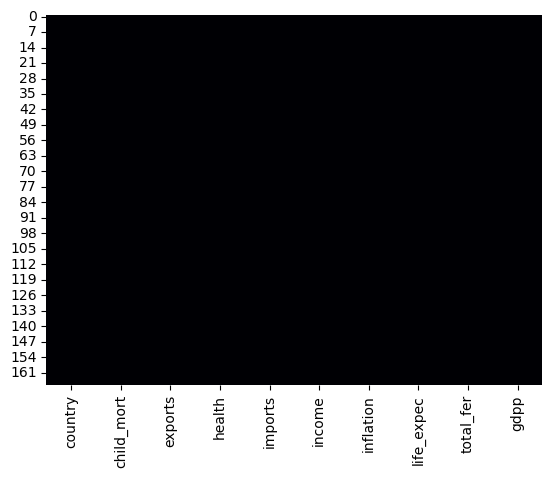

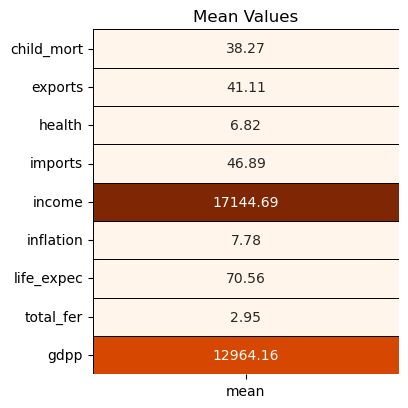

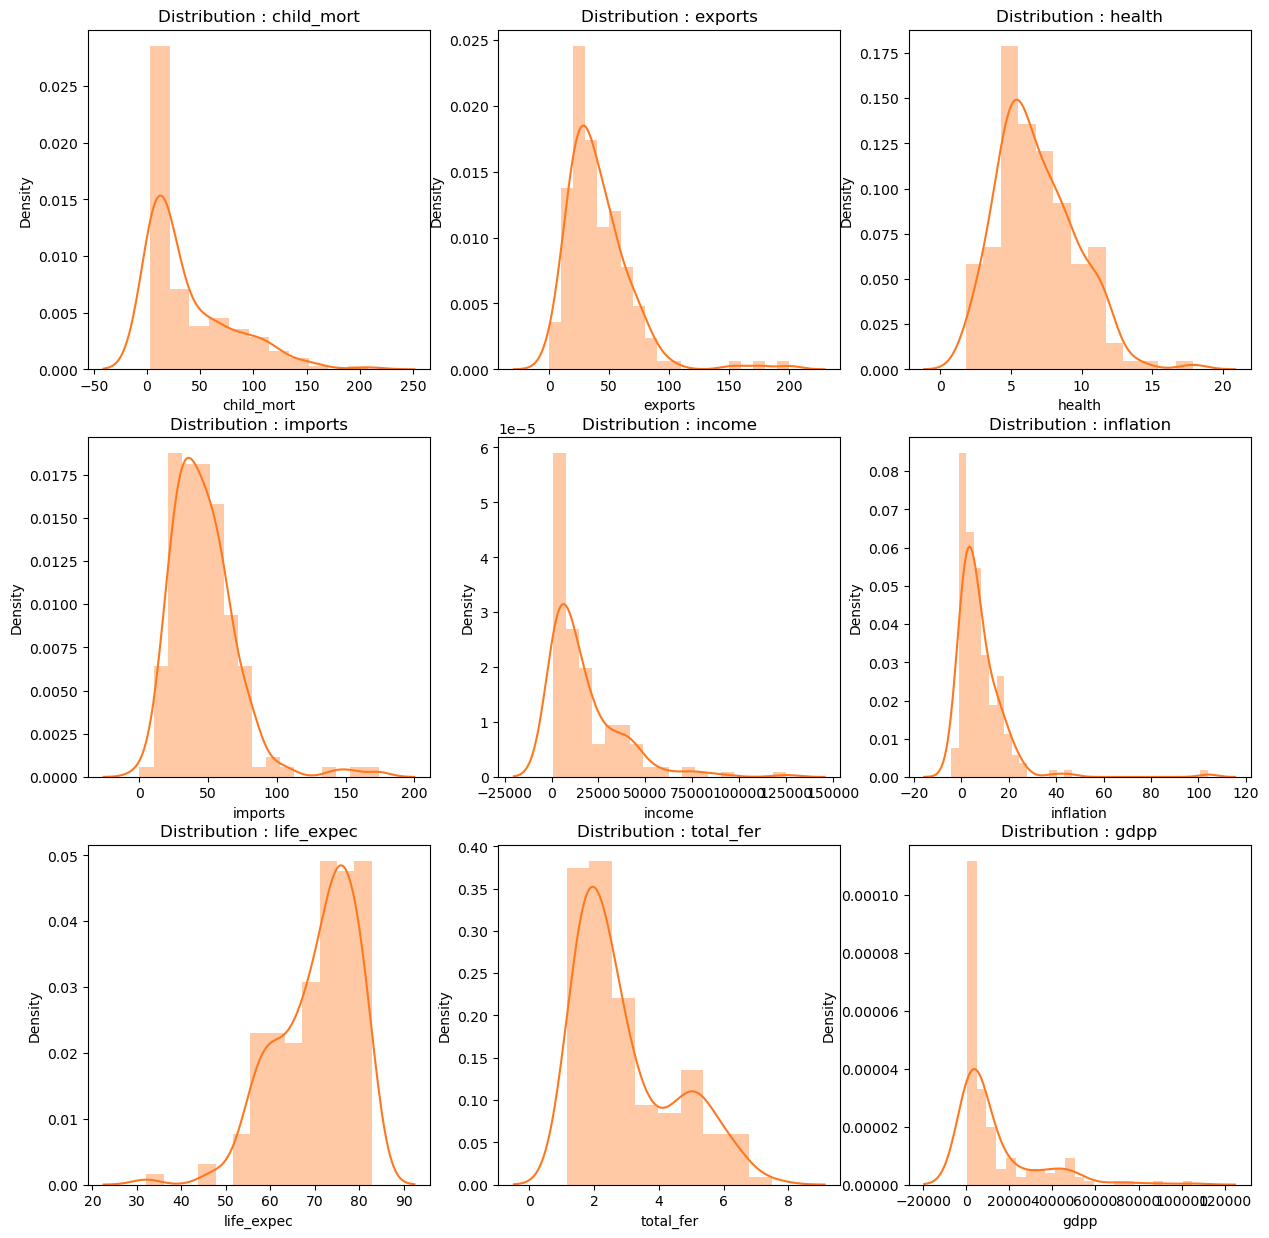

In [52]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [54]:
len(data['country'].unique()) == len(data)

True

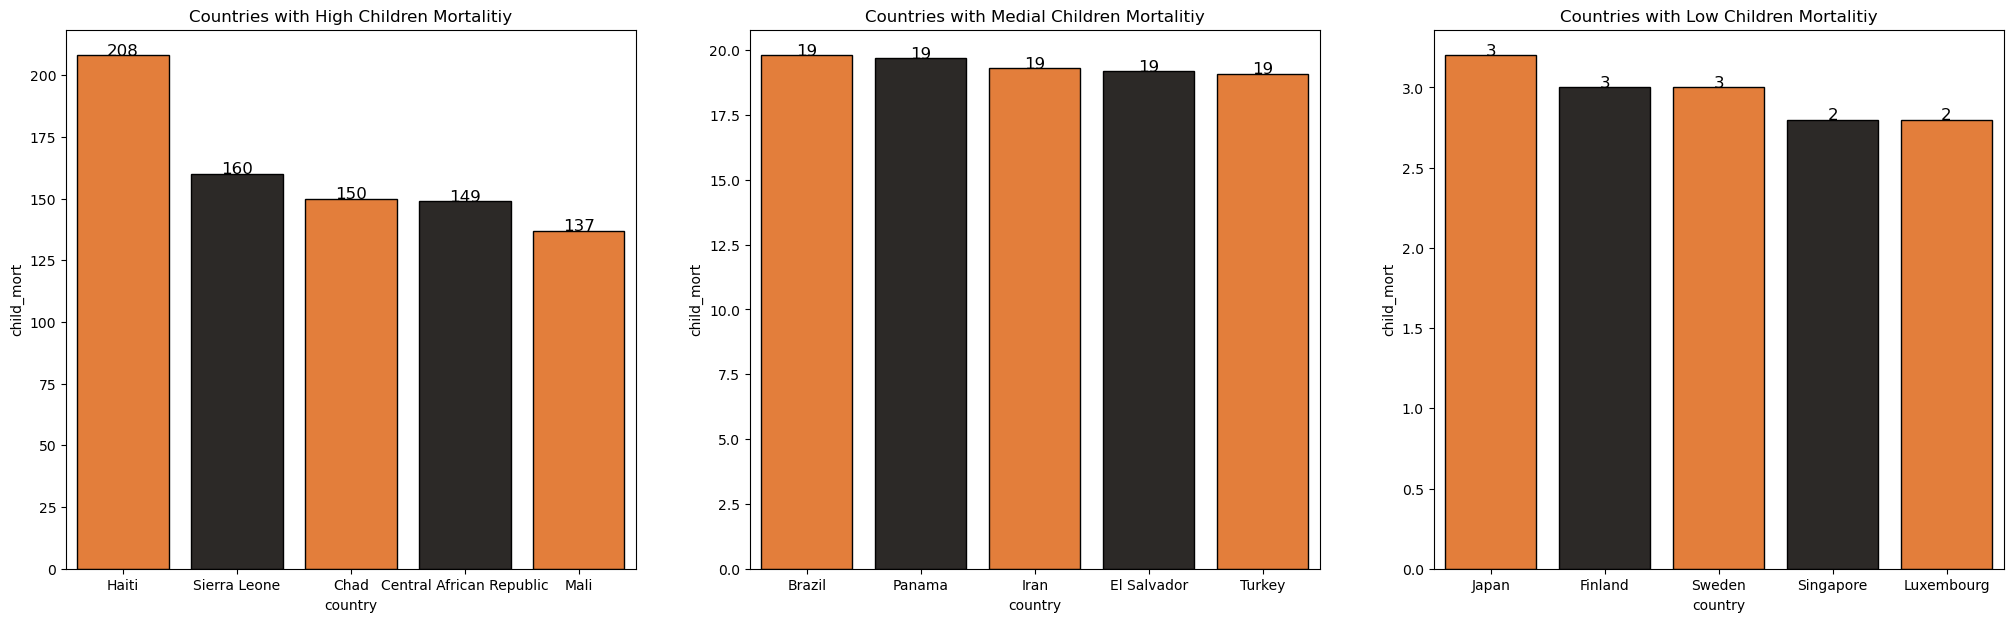

In [56]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **exports : It is a very important factor for building the nation's economy. Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!**

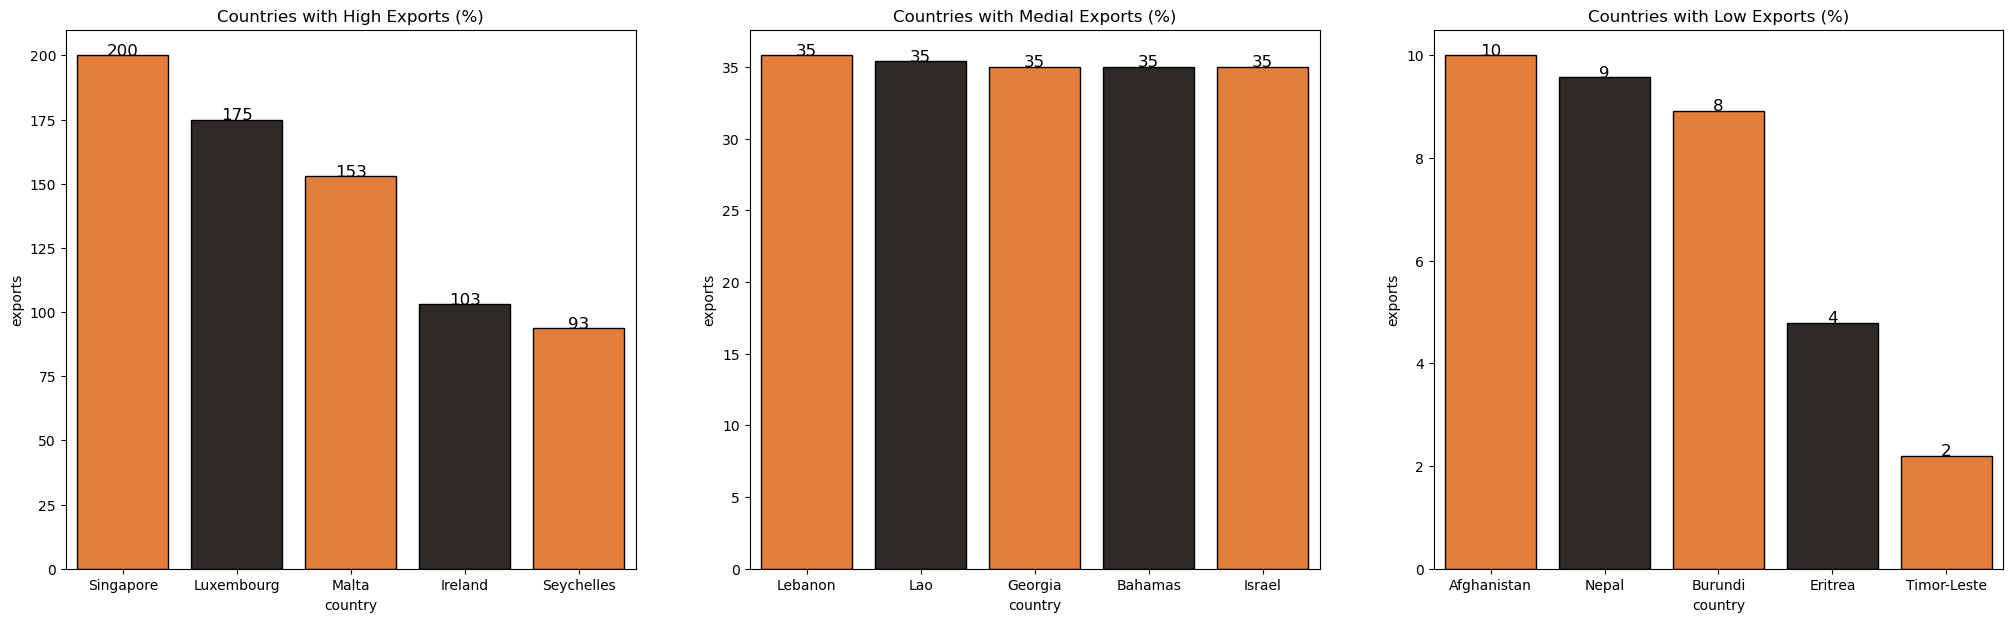

In [58]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **exports** of a nation are usually goods and services created domestically but sold to other nations. Goods and services exported depends on factors like the geographical location, natural resources, population size & their preference towards specific skills, etc.
- Despite **Singapore's** population size not being in the top 100, they have the highest number of **exports**. **Luxembourg** & **Malta** have probably followed the same route.
- **Afghanistan** & **Nepal** are present in the lower end of **exports**. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

- **health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!**

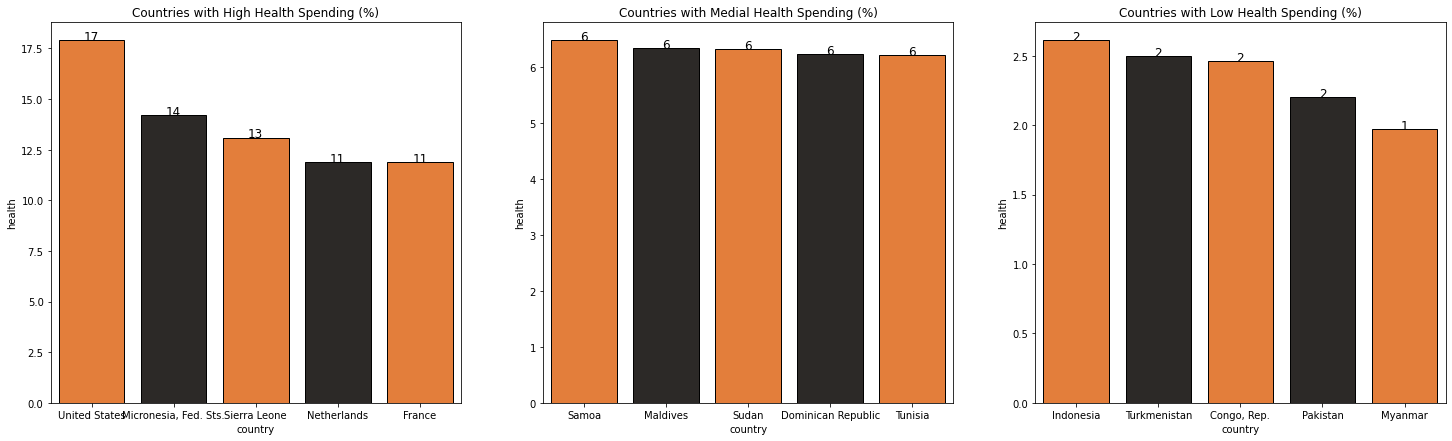

In [14]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

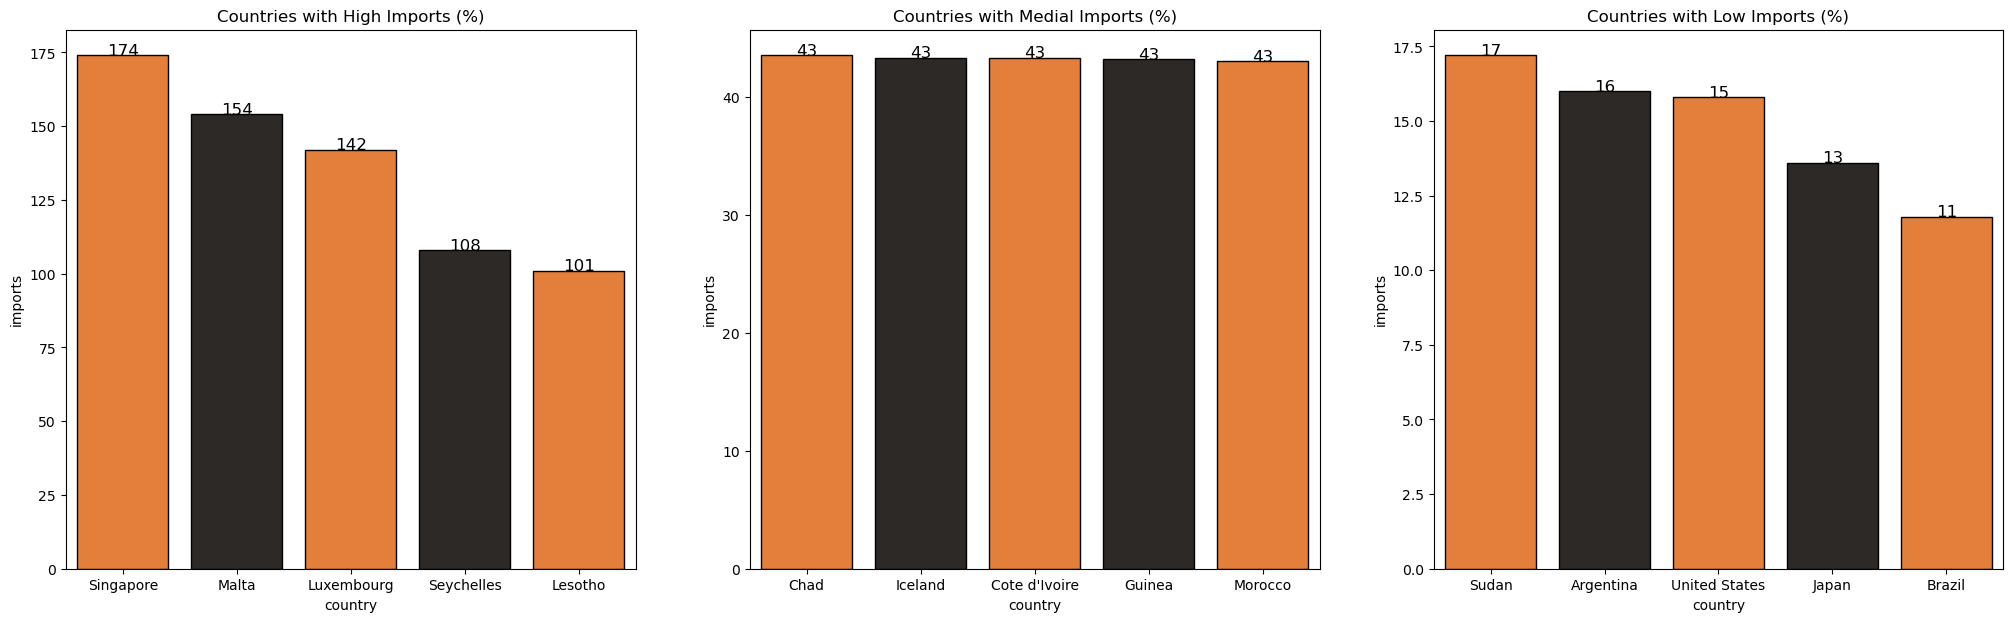

In [60]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **imports** stats of a nation describe the self reliance of a nation to solve their problems irrespective of being handicapped on one of the essential resources.
- **Singapore**, **Malta**, **Luxembourg** & **Seychelles** are present in the top 5 of **exports** as well as **imports**. This is just an indication that highlight the nation's strategies of probably capitalizing on their resources and creating solid **exports** that gets countered by the heavy **imports** on something else. This just balances the books!
- **Brazil** has the lowest **imports** out of all the nations with **11%**. **Sudan** is the only African country present in this lower end list with **17%**.

- **income : Income of the per person is a key indicator about country's economic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!**

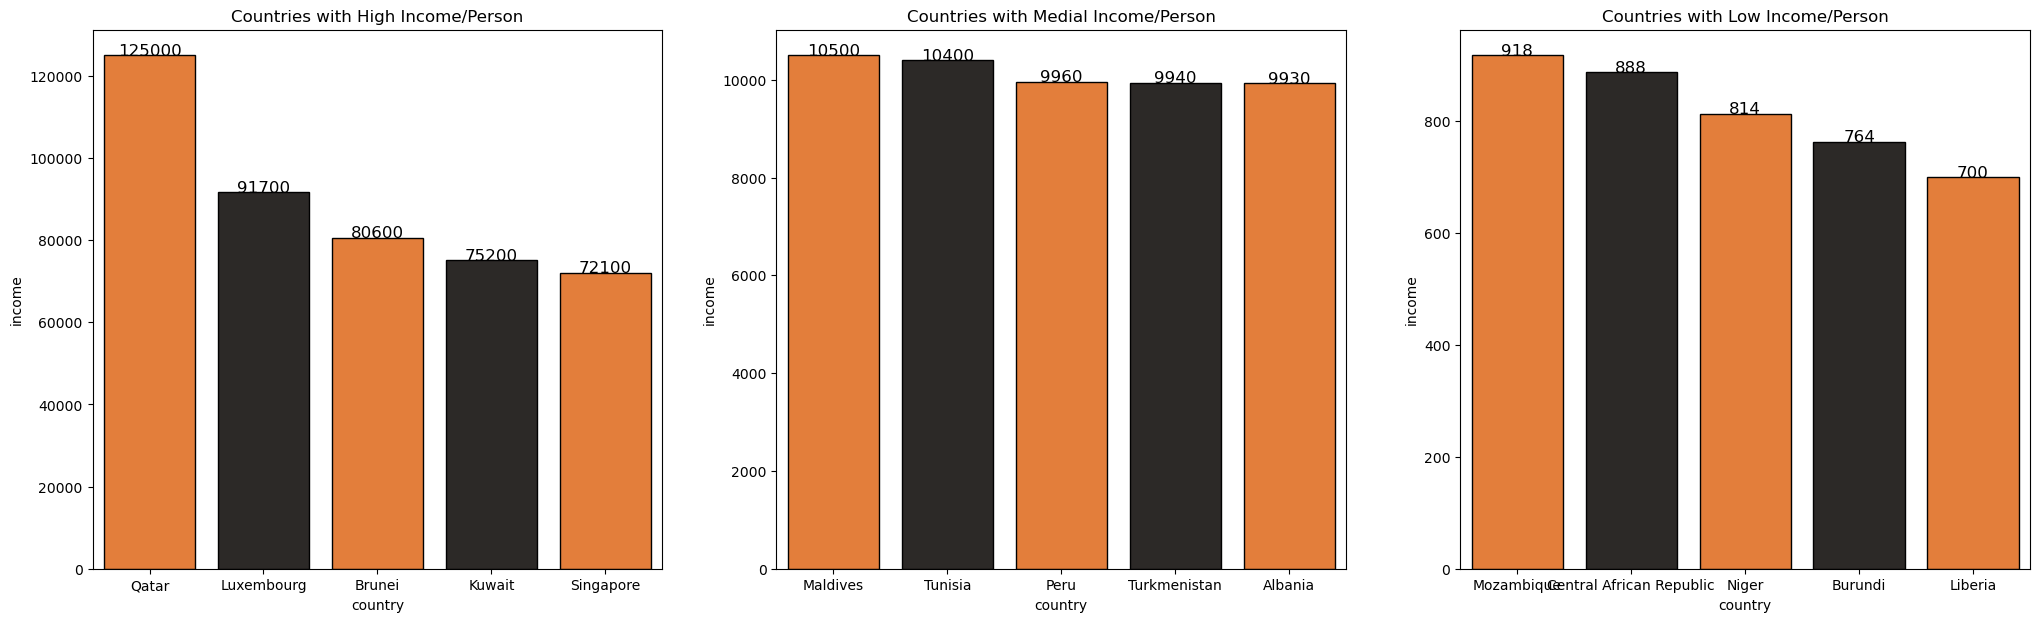

In [62]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- Citizens of the **Qatar** have the highest **income** out of all the countries with a difference of **30k** more than the 2nd placed countries. **Singapore** & **Luxembourg** are again present in the top 5 of another feature.
- Lower end of the **income** is dominated by the **African** nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered. 
- The difference in the **income** of the nations in the top, middle and lower end is quite significant that will have an effect on every other features.

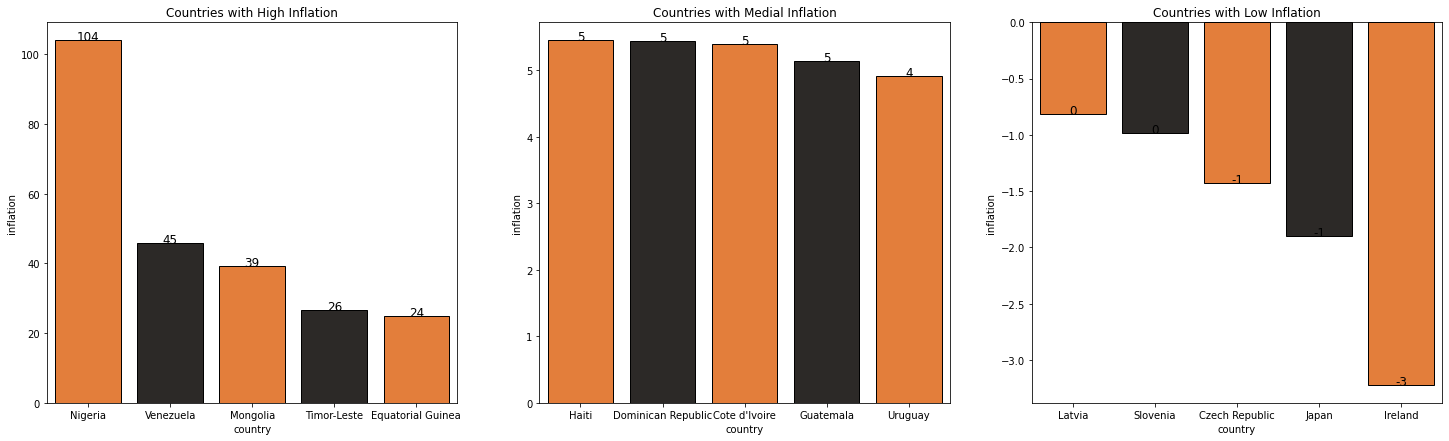

In [17]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- Higher **inflation** reduces the purchasing power of the citizens. Countries present at the top end of **inflation** have a devastating economic situation. Having such high inflation is a risk to the existence of the nation.
- Similarly, the lower end of **inflation** has negative values i.e known as deflation. It signals a economy in a downward spiral leading to a recession or even a depression.

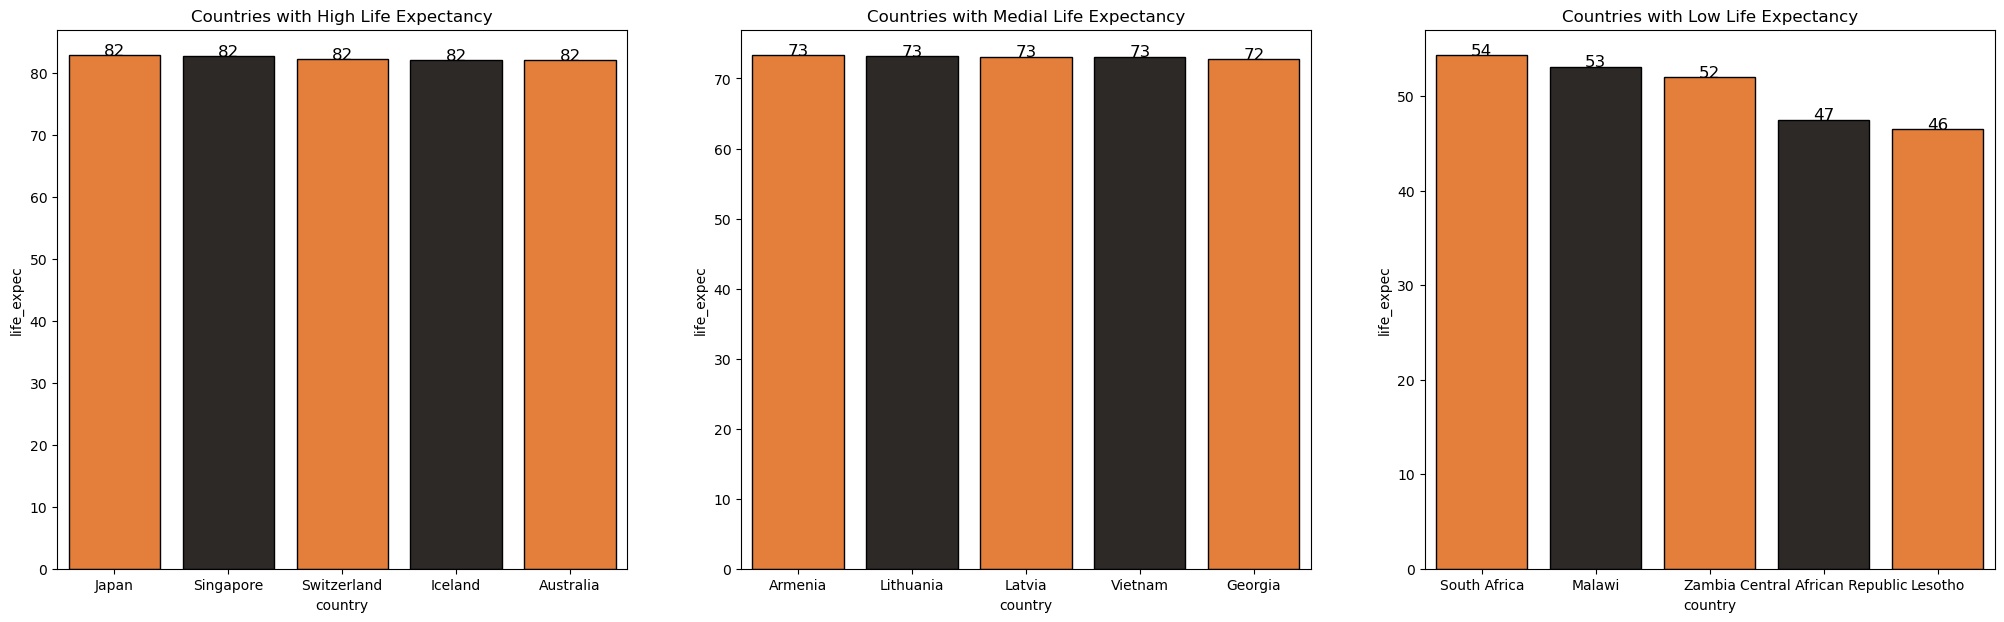

In [64]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **life_expec** depends alot on mental state as well as the lifestyle adopted by the citizens. **Singapore** is again present in the top of 5 of a feature.
- None of the countries with a high **life_expec** are present in the top 5 of **health** that is related to the spending done by the citizen on health.
- **African** countries are again present in the lower end for another feature.

- **total_fer : Economically backward countries have a high fertility rate!**

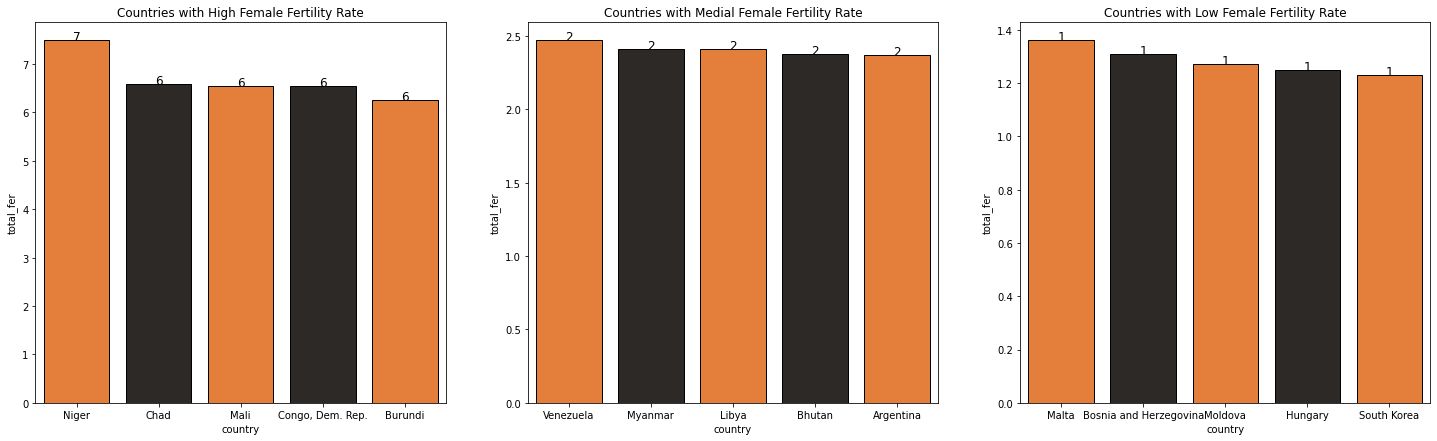

In [19]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **African** countries dominate the **total_fer** with values **6+**.
- Mean **total_fer** value is **2** whereas lower end values of **1** concern abit as well.

- **gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!**

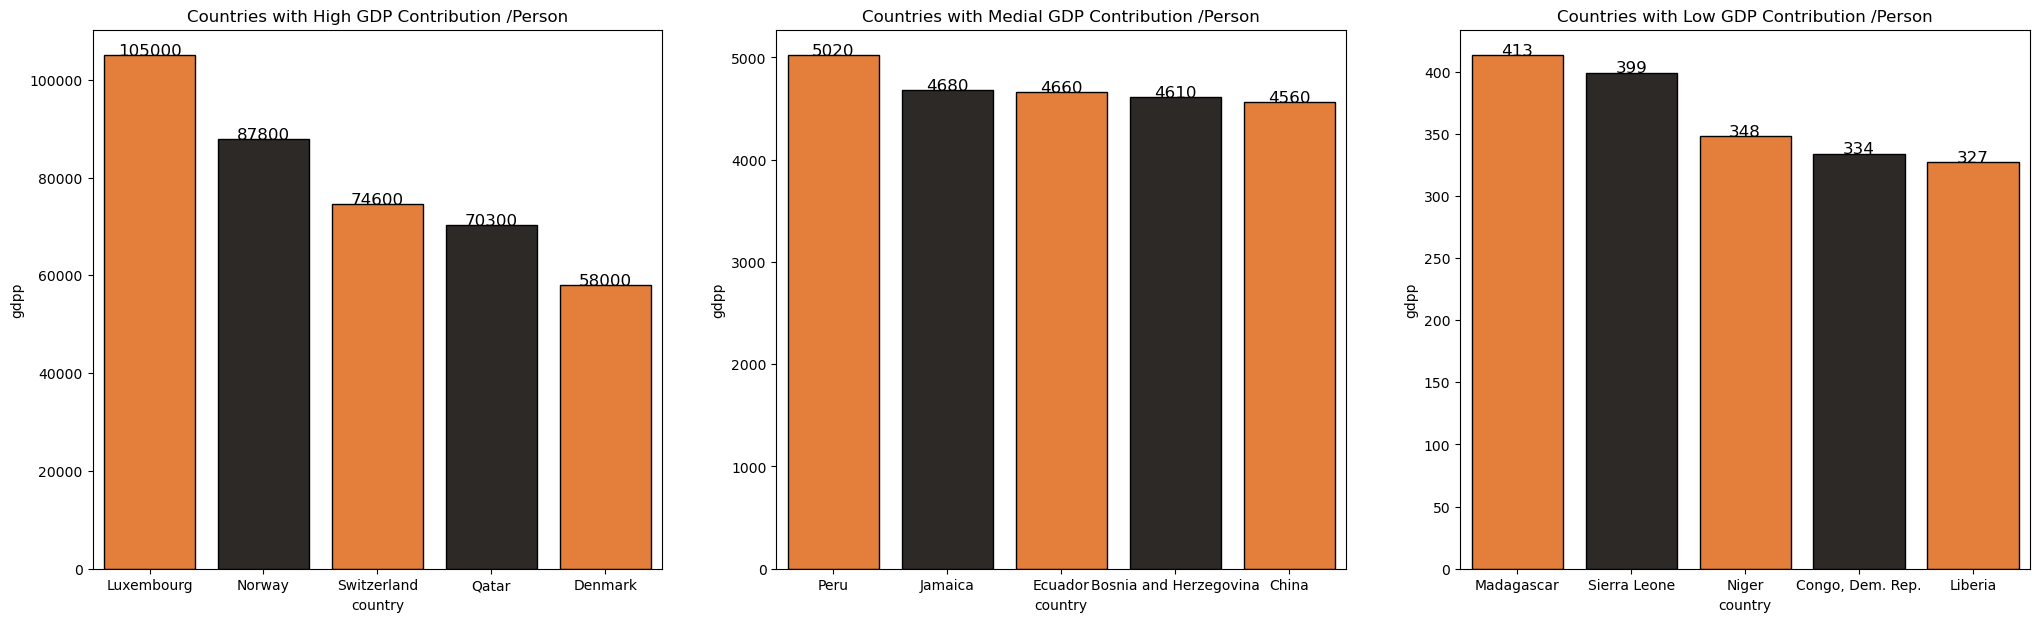

In [66]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- It is a tricky feature as the population of the nation is a significant factor. One clear cut example of this is **China**. It has a huge population alongwith huge GDP.
- **Luxembourg** is again present in the top ranks. **Switzerland** & **Qatar** are present in the top 5 similar to **income**.
- Lower end is again dominated by **African** nations that labels them as the economically backward.

###  Numerical Features :

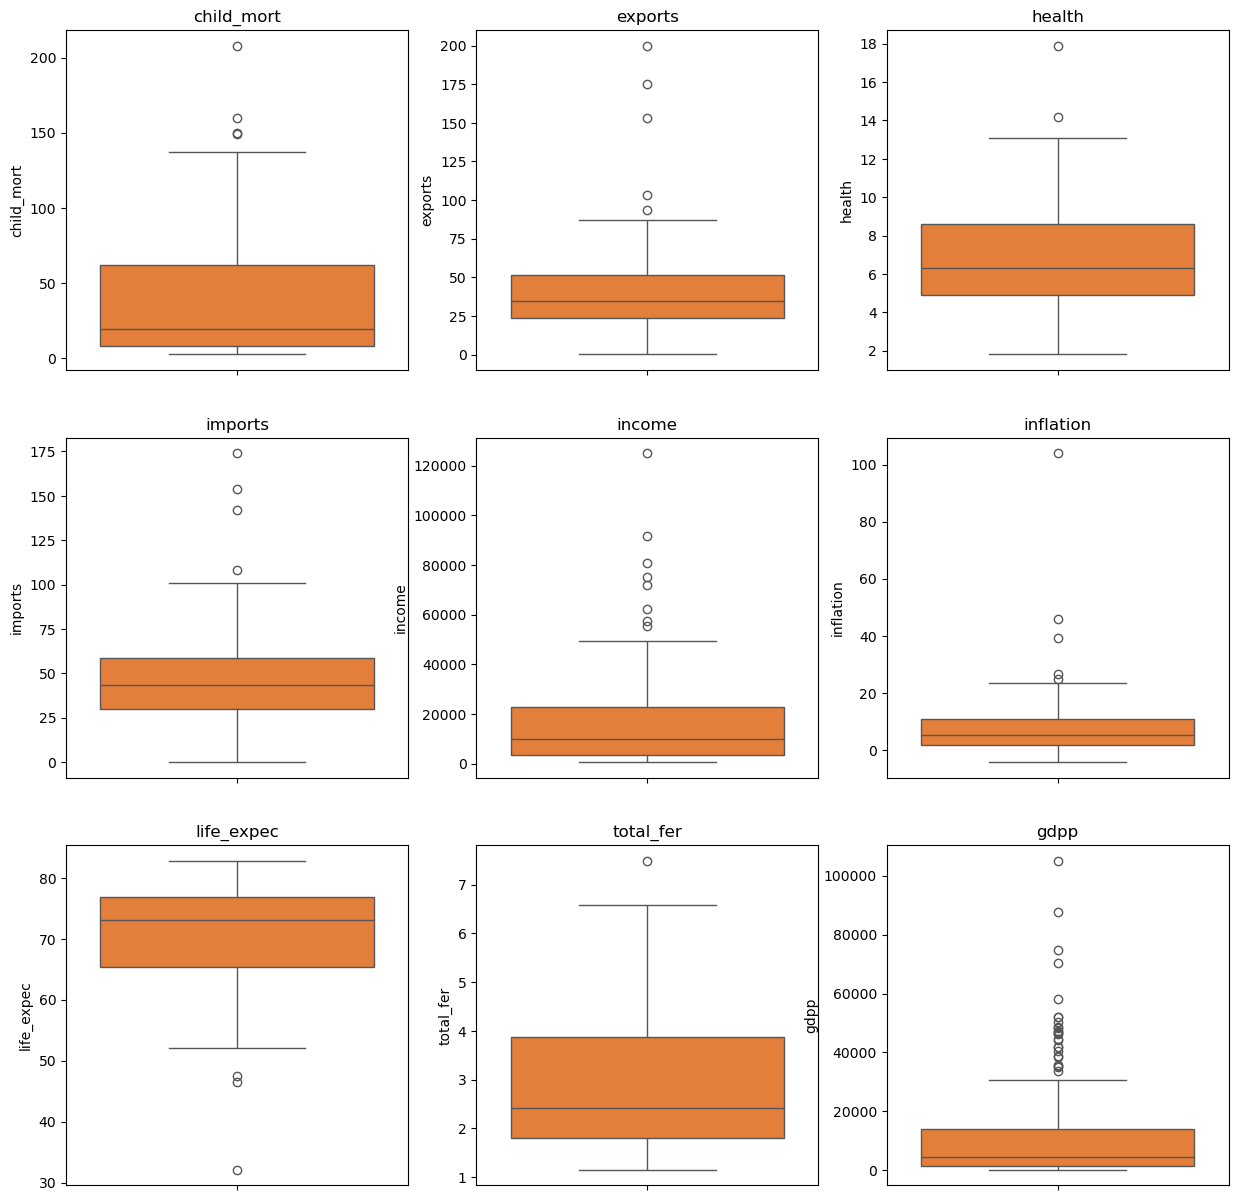

In [68]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

### Correlation Matrix :

In [70]:
ut = np.triu(data.corr())
lt = np.tril(data.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

ValueError: could not convert string to float: 'Afghanistan'

In [72]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

Health  Trade  Finance
0    6.24   1.20     1.35
1    3.04   1.72     1.47
2    3.39   1.60     3.17
3    6.47   2.43     3.49
4    2.96   2.36     2.24

### Data Scaling :

In [74]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

Country  Health  Trade  Finance
0          Afghanistan    0.63   0.14     0.08
1              Albania    0.13   0.20     0.09
2              Algeria    0.18   0.19     0.21
3               Angola    0.66   0.28     0.24
4  Antigua and Barbuda    0.12   0.28     0.15

### Principal Component Analysis (PCA) :

- It is a dimension reduction method that is preferrably used for an Unsupervised Learning Problem.

In [76]:
df2 = data.copy(deep = True)

col = list(data.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
df2.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        0.43     0.05    0.28     0.26    0.01       0.13        0.48   
1        0.07     0.14   -0.10     0.28    0.07       0.08        0.87   
2        0.12     0.19   -0.97     0.18    0.10       0.19        0.88   
3        0.57     0.31   -1.45     0.25    0.04       0.25        0.55   
4        0.04     0.23   -0.29     0.34    0.15       0.05        0.88   

   total_fer  gdpp  
0       0.74  0.00  
1       0.08  0.04  
2       0.27  0.04  
3       0.79  0.03  
4       0.15  0.11

In [78]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

- These are the variance values of the each feature present in the dataset.

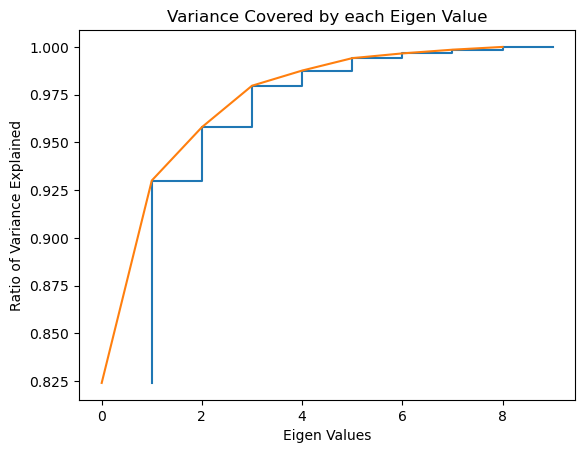

In [80]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [82]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

0     1     2
0  0.22  0.64  0.09
1 -0.08 -0.17 -0.21
2 -0.96 -0.13 -0.13
3 -1.51  0.47  0.28
4 -0.26 -0.24 -0.06

In [84]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

### <center>Feature Combination : Health - Trade - Finance</center> 

#### Elbow Method & Silhouette Score Method :

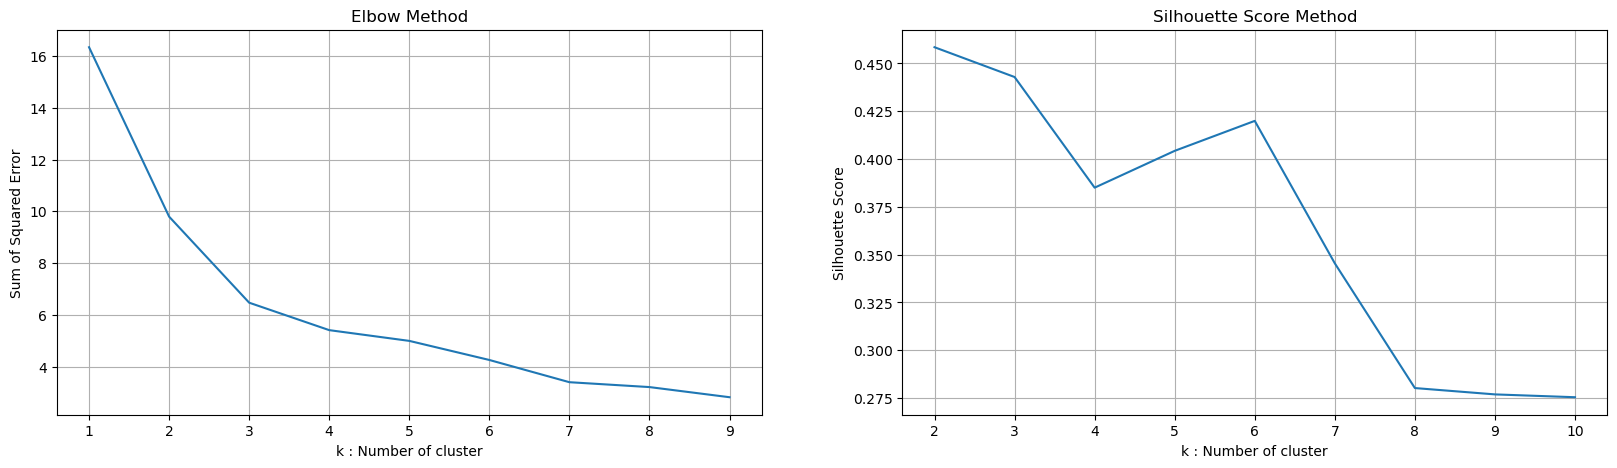

In [86]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

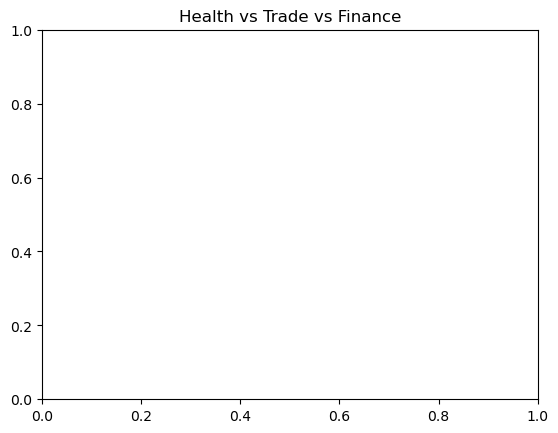

In [90]:
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels; df1['Class'] = labels

fig = plt.figure()
ax = Axes3D(fig)
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
ax.scatter(x,y,z,c = y)
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

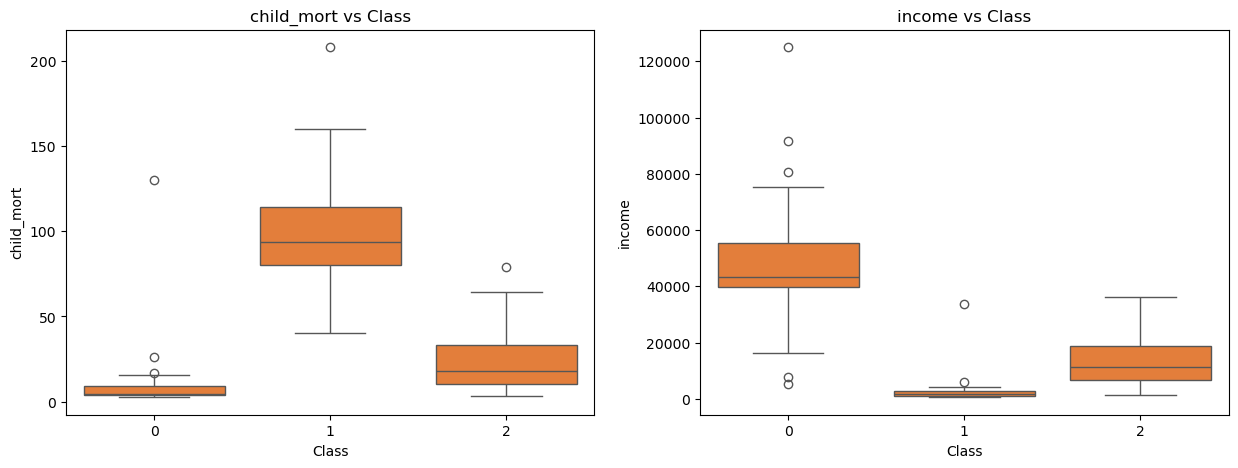

In [92]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : No Help Needed**
    - **1 : Help Needed**
    - **2 : Might Need Help**

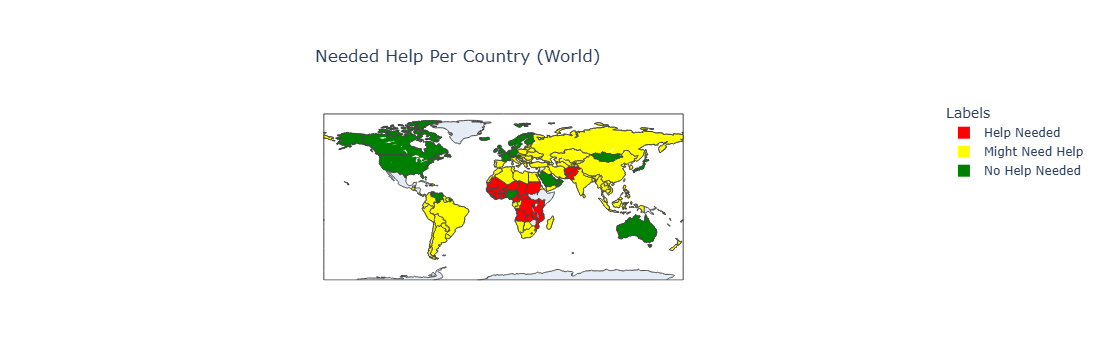

In [94]:
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### <center>PCA Data</center> 

#### Elbow Method & Silhouette Score Method :

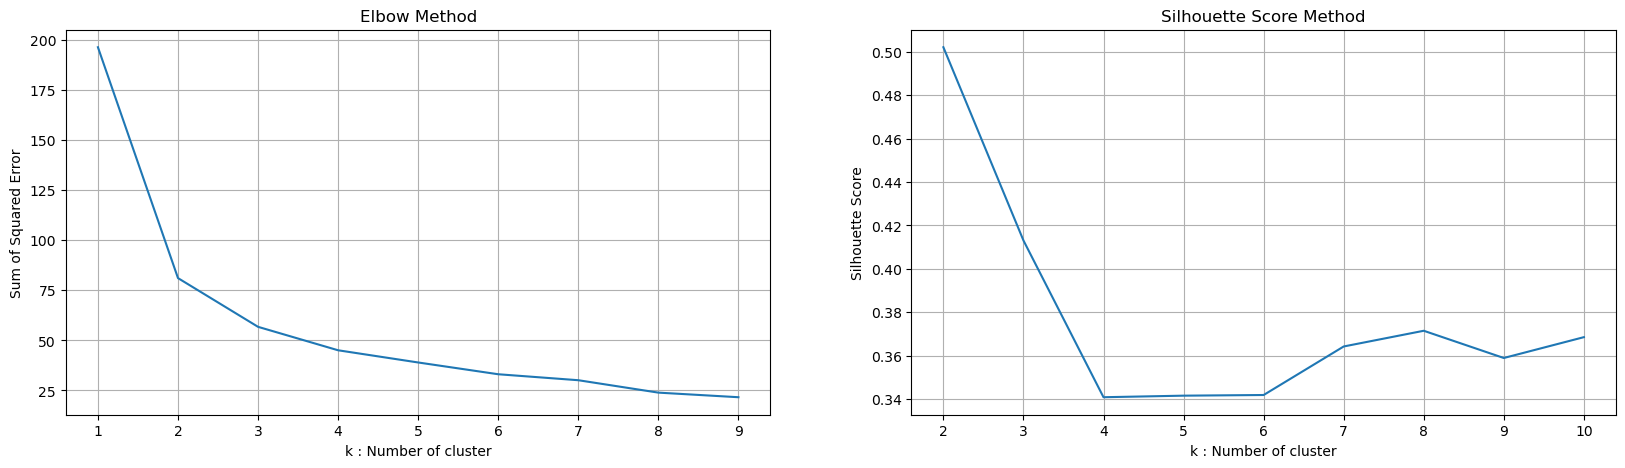

In [96]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 3**        

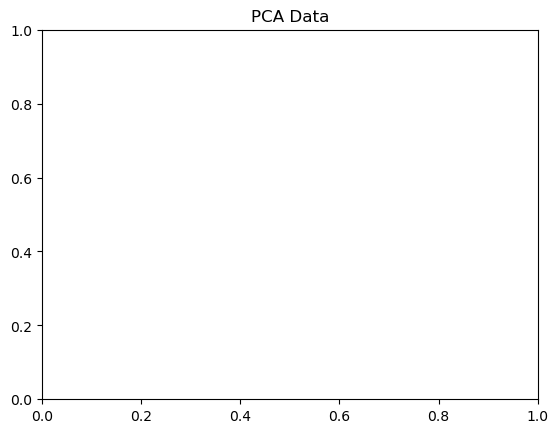

In [98]:
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels; pca_df2['Class'] = labels

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
ax.scatter(x,y,z,c = y)
plt.show();

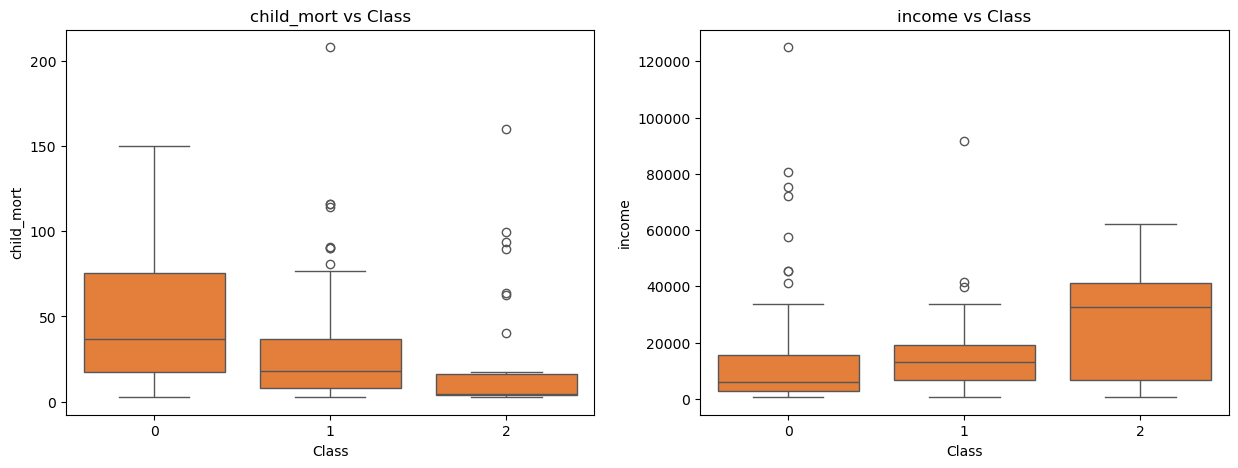

In [100]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

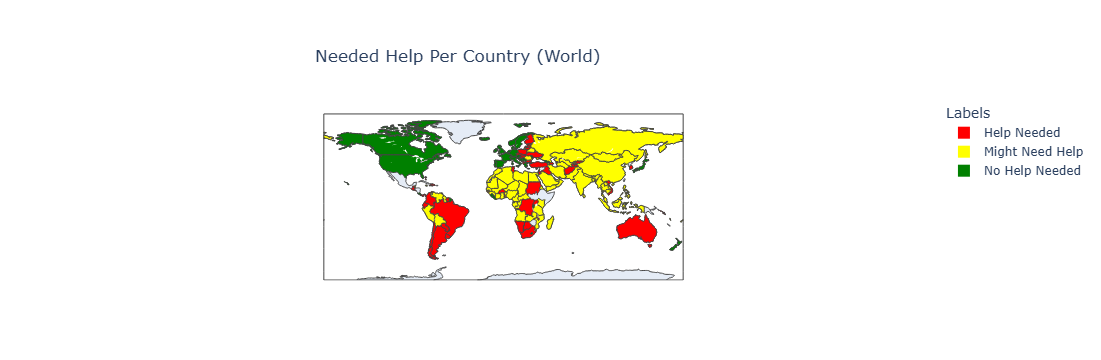

In [102]:
pca_df2.insert(0,column = 'Country', value = data['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [104]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### <center>Feature Combination : Health - Trade - Finance</center> 

In [106]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

- We select **minPts** = 8 i.e >= 2 * 3 features 
- The value assigned to the **n_neighbors** : **minPts** - 1.
- From the graph above, we select :
    - **eps** : 0.08

In [108]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; df1['Class'] = labels

Number of Clusters :  3
Number of Outliers :  67


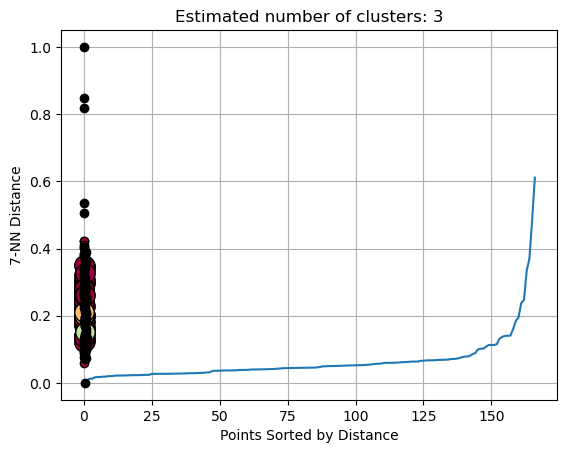

In [110]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

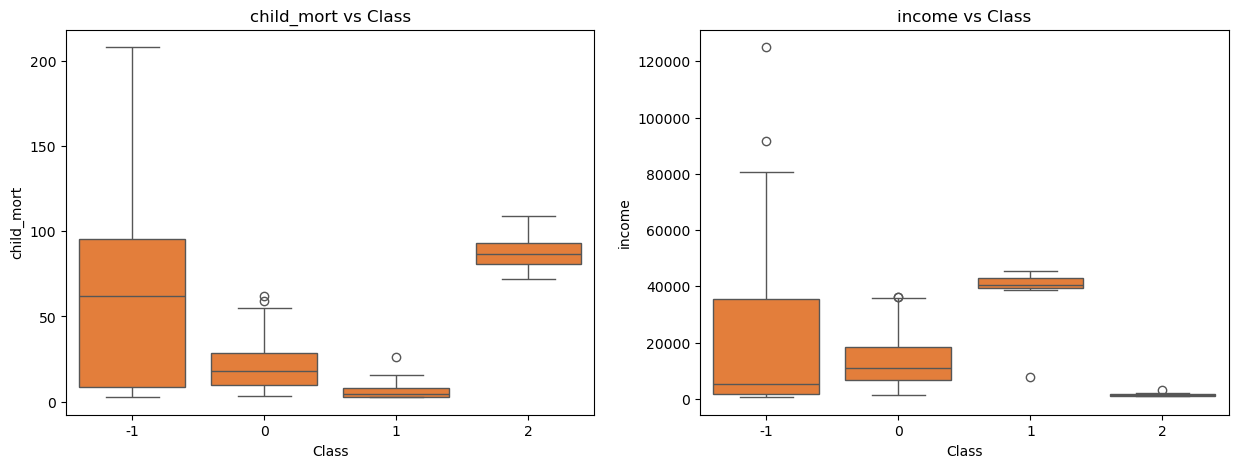

In [112]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- By rule **-1** is associated with **Noise / Outliers**!
- From the above plot we can conclude :
    - **-1 : Noise / Outliers**
    - **0 : Might Need Help**
    - **1 : No Help Needed**
    - **2 : Help Needed**

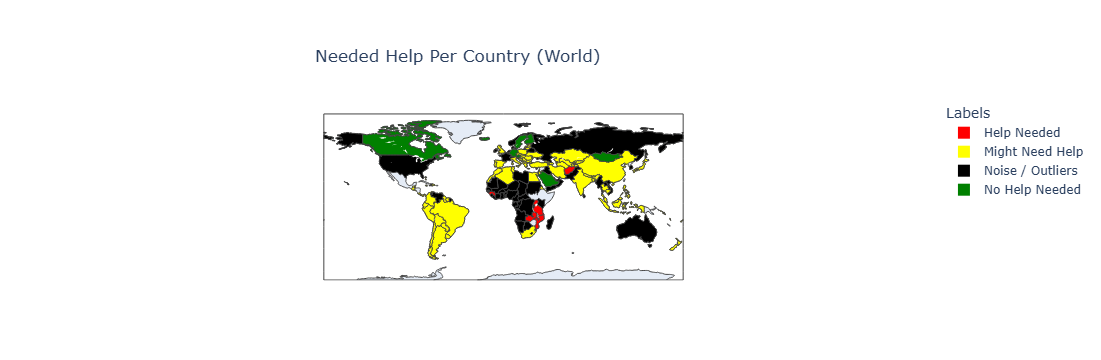

In [114]:
df1['Class'].loc[df1['Class'] == -1] = 'Noise / Outliers'
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] ='Help Needed'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [134]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### <center>PCA Data</center> 

In [136]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');
plt.grid()
plt.plot(distances);

- We select **minPts** = 8 i.e >= 2 * 3 features 
- The value assigned to the **n_neighbors** : **minPts** - 1.
- From the graph above, we select :
    - **eps** : 0.08

In [118]:
db = DBSCAN(eps = 0.2, min_samples = 8).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; pca_df2['Class'] = labels

Number of Clusters :  3
Number of Outliers :  94


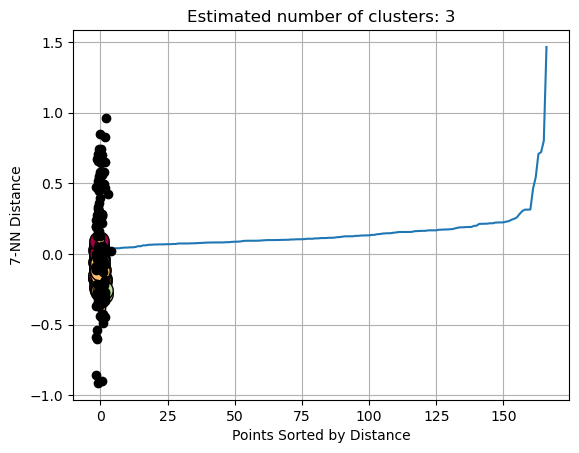

In [138]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

- We again draw boxplots of **income** & **child_mort** w.r.t labelled clusters for identifying the assistance required by the nations!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

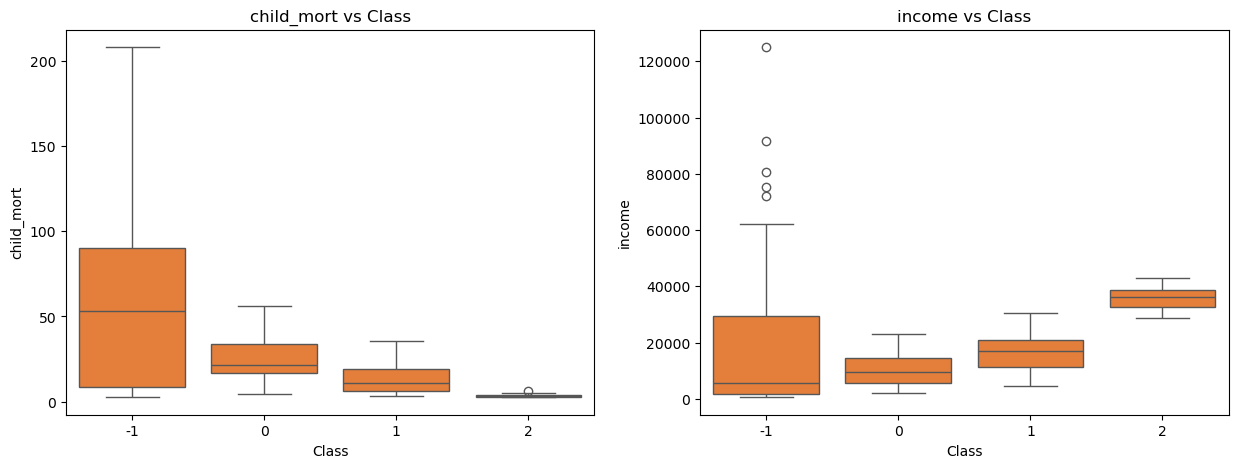

In [122]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **-1 : Noise / Outliers**
    - **0 : Help Needed**
    - **1 : Might Need Help**
    - **2 : No Help Needed**

In [48]:
pca_df2['Class'].loc[pca_df2['Class'] == -1] = 'Noise / Outliers'
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] ='No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color_discrete_sequence=["orange", "red", "green",'black'],
                    color = pca_df2['Class'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage

### <center>Feature Combination : Health - Trade - Finance</center> 

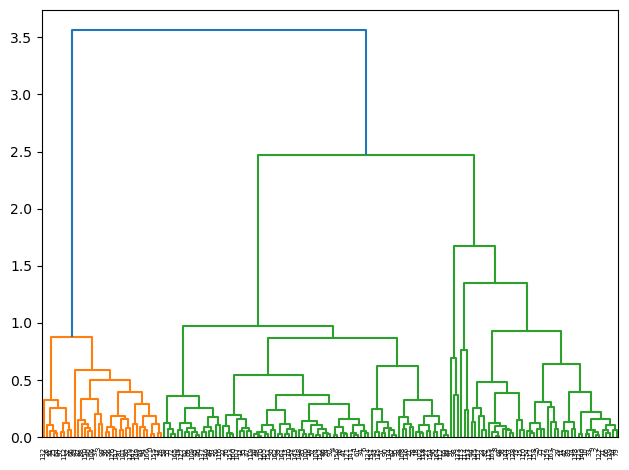

In [126]:
linkage_data = linkage(m1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

- In this case, we need to divide the countries into 3 categories. That is why we will select a 3 clusters directly. Dendrogram analysis for this dataset is kind of redundant. 
- Here, we can see that 1 **blue line** alongwith 2 **red lines** are the penultimate clusters that before connecting together.
- It has 3 branches, thus indicating the **3 clusters** that it creates before merging into 1!

In [130]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(m1)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; df1['Class'] = pred_agc

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

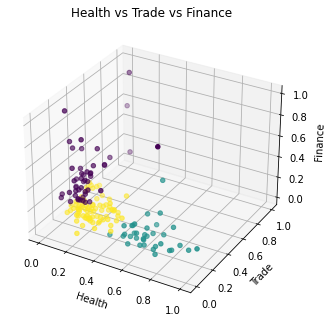

In [52]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(x,y,z,c = df1['Class'])
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

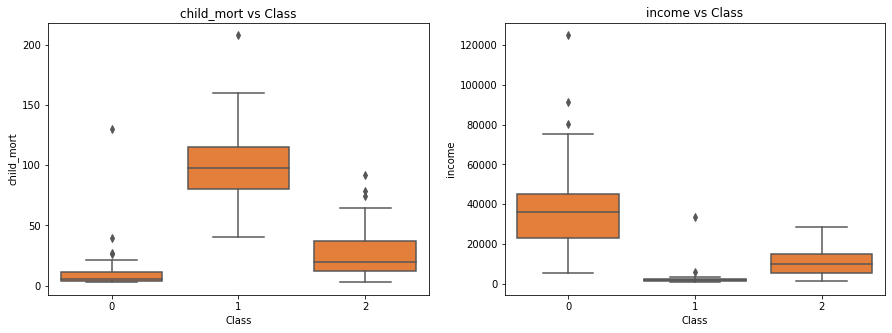

In [53]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : No Help Needed**
    - **1 : Help Needed**
    - **2 : Might Need Help**

In [54]:
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed' : 'Red',
                                          'Might Need Help' : 'Yellow',
                                          'No Help Needed' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### <center>PCA Data</center>

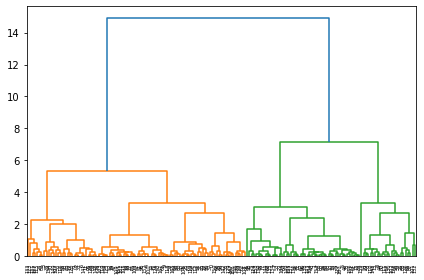

In [55]:
linkage_data = linkage(m2, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

- In this case, we need to divide the countries into 3 categories. That is why we will select a 3 clusters directly. Dendrogram analysis for this dataset is kind of redundant.
- Here, again, we can see that 1 **blue line** alongwith 2 **red lines** are the penultimate clusters formed before connecting together.
- It has 3 branches, thus indicating the **3 clusters** that it creates before merging into 1!

In [56]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(m2)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; pca_df2['Class'] = pred_agc

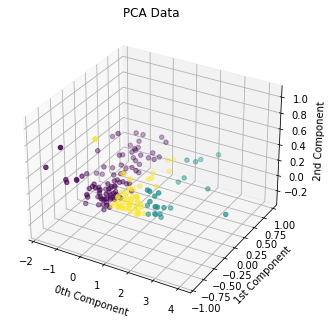

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])
ax.scatter(x,y,z,c = pca_df2['Class'])
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

- We again draw boxplots of **income** & **child_mort** w.r.t labelled clusters!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

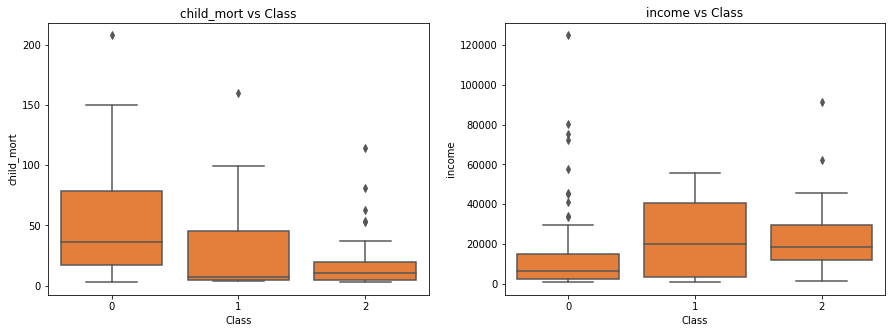

In [58]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : Help Needed**
    - **1 : Might Need Help**
    - **2 : No Help Needed**

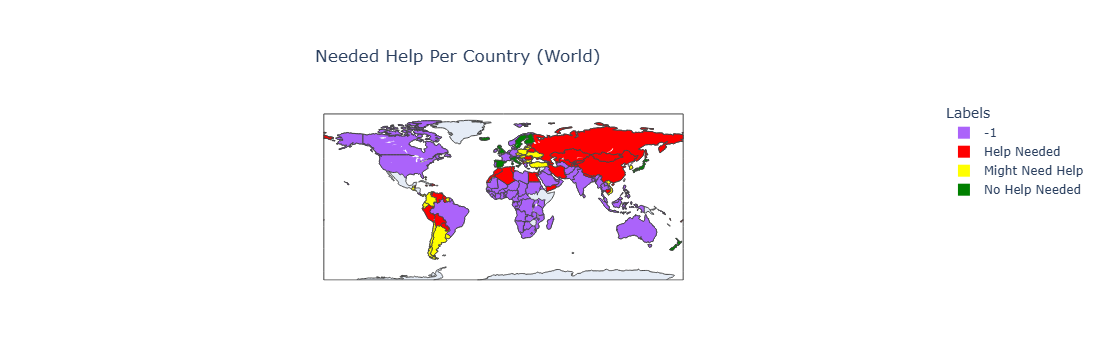

In [132]:
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],  
                    color_discrete_map={'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')